# BUS 41204 Machine Learning Midterm
### Winter 2018
### Max Liu

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

## Question 1

## 1.1

We cannot use all of the variables to predict at the start of an auction whether it will be competitive. Specifically, we cannot use the "ClosePrice" variable because we would not know the close price of an auction item at the start of an auction. For obvious reasons we also cannot use the "Competitive?" variable because it is the value we are trying to compute. All of the other variables should be known at the start of an auction. One thing to note is the "Buy It Now" button on eBay, there is not enough data to know whether or not this button was used to purchase any of the auction items. Thus, we assume that at the beginning of each auction we would know the duration of the auction and the end day.

## 1.2

In [42]:
# we want to first load the data set and then parition it into 60% training and 40% validation
csv_file = "eBayAuctions.csv"
df = pd.read_csv(csv_file)

# label encode so that we can work with the categorical data
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['currency'] = le.fit_transform(df['currency'])
df['endDay'] = le.fit_transform(df['endDay'])

y = df['Competitive?']
x = df.drop(columns=['ClosePrice', 'Competitive?']) # we remove the variables that cannot be used
# want the dataframes to be numpy arrays
y = y.values
x = x.values

# split the data 60% training 40% validation
# NOTE: we are not running cross-validation to determine the best model
#       the models are being optimized against only the validation set that
#       we are taking from the whole training set
test_percent = 0.40
seed = 11
shuffle_data = True
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_percent,
                                                            random_state=seed,
                                                            shuffle=shuffle_data)

### Classification Tree

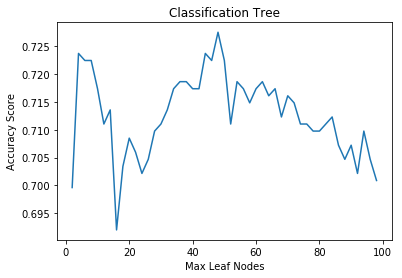

Best Accuracy Score: 0.727503
Best Max Leaf Nodes: 48.000000
[[226 145]
 [ 91 327]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 226 | 145 |
| 1 | 91 | 327 |


In [43]:
# we want to optimize the max leaf nodes of our classification tree
leaf_values = np.arange(2, 100, 2)
scores = []
best_score = 0
best_leaf = 0
for l in leaf_values:
    clf = DecisionTreeClassifier(max_leaf_nodes=l)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_leaf = l
    
scores = np.array(scores)

# plot the results
plt.plot(leaf_values, scores)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Classification Tree")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best Max Leaf Nodes: %f" % best_leaf)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Boosted Tree (AdaBoost)

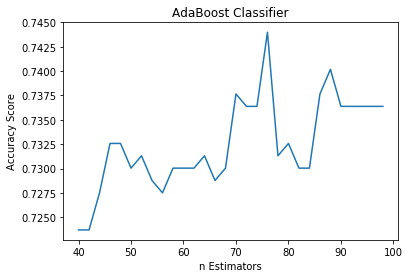

Best Accuracy Score: 0.743980
Best n Estimators:   76.000000
[[260 111]
 [ 97 321]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 260 | 111 |
| 1 | 97 | 321 |


In [44]:
# we want to optimize the n estimators of our AdaBoost classifier
n_values = np.arange(40, 100, 2) # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_n = 0
for n in n_values:
    clf = AdaBoostClassifier(n_estimators=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
    
scores = np.array(scores)

# plot the results
plt.plot(n_values, scores)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy Score")
plt.title("AdaBoost Classifier")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best n Estimators:   %f" % best_n)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Bagging Classifier

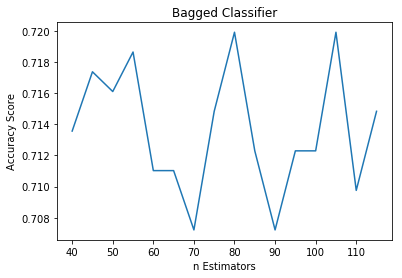

Best Accuracy Score: 0.719899
Best n Estimators:   80.000000
[[245 126]
 [ 99 319]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 245 | 126 |
| 1 | 99 | 319 |


In [53]:
# we want to optimize the n estimators of our Bagging classifier
n_values = np.arange(40, 120, 5) # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_n = 0
for n in n_values:
    clf = BaggingClassifier(n_estimators=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
    
scores = np.array(scores)

# plot the results
plt.plot(n_values, scores)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy Score")
plt.title("Bagged Classifier")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best n Estimators:   %f" % best_n)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Random Forest Classifier

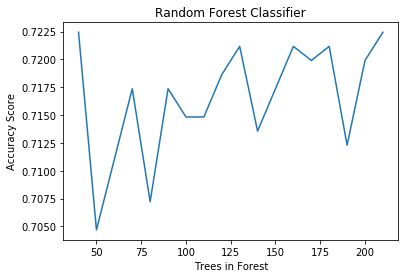

Best Accuracy Score: 0.722433
Best n Estimators:   40.000000
[[248 123]
 [ 96 322]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 248 | 123 |
| 1 | 96 | 322 |


In [57]:
# we want to optimize the n estimators of our Random Forest classifier
n_values = np.arange(40, 220, 10) # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_n = 0
for n in n_values:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
    
scores = np.array(scores)

# plot the results
plt.plot(n_values, scores)
plt.xlabel("Trees in Forest")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Classifier")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best n Estimators:   %f" % best_n)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

Note: There are quite a few other parameters that could have been optimized but for the sake of runability I chose the features that had the greatest impact on the performance of the model. Including other paramters would have caused these models to run in $n^2$ time.

## 1.3

In [58]:
# create lift curve for the four models here

## 1.4

describe difference between the different tree models here

# Question 2

## 2.1

The confusion matrix will look something like this:

|                 | respond        | did not respond |
|-----------------|----------------|-----------------|
| respond         | true positive  | false positive  |
| did not respond | false negative | true negative   |

Where the first column labels are the true values and the rows show what the classifier predicted the class was.

## 2.2

The confusion matrix for a model will be filled out by fitting our model with some training data set and the predicting the classes for a known test set. We can then compare how many of the respondants were classified as respondants by the model and how many respondants were classified as someone who would not respond. This would fill out the first line in our confusion matrix above. We could then do the same thing for those who did not respond to fill out the second row of our confusion matrix.

## 2.3

Based on the given information, we know that it costs \$0.50 to send a special offer to one of our existing customers (a budget of \$10,000 will allow us to send the offer to 20,000 existing customers). We also know that each customer that responds will give us \$1,000 in revenue (200 people responded the first time and created \$200,000 in revenue). In summary we know: $$\text{Benefit of responding:  \$999.50}$$ $$\text{Cost of not responding: \$0.50}$$

## 2.4

